In [1]:
import yfinance as yf

In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
import math
#import pickle

In [5]:
#import numpy as geek  

In [6]:
import matplotlib.pyplot as plt

In [7]:
import pandas_datareader as web

In [8]:
import statsmodels.api as sm

In [9]:
import datetime
from dateutil.relativedelta import relativedelta
from datetime import date

In [10]:
pd.set_option('mode.use_inf_as_na', True)

In [11]:
stock = 'crox'

short_moving_average_span = 20
long_moving_average_span = 50
cutoff=0.51
invest = 100
years_of_data_to_process = 20
period = 10

In [12]:
currentDateTime = datetime.datetime.now()
date = currentDateTime.date()
#print (date)
year = date.strftime("%Y")
start_year =  int(year) - years_of_data_to_process
start = datetime.datetime(start_year, 1, 1)
print (start)

2001-01-01 00:00:00


In [13]:
#data =  yf.download(stock, start=start)

In [14]:
data = web.DataReader(stock, data_source='yahoo', start = start, end = date)
print(data)

                  High         Low        Open       Close      Volume  \
Date                                                                     
2006-02-08   16.250000   14.070000   15.000000   14.275000  23814000.0   
2006-02-09   14.670000   13.060000   14.620000   13.500000   4463800.0   
2006-02-10   13.770000   13.010000   13.500000   13.275000   1800400.0   
2006-02-13   14.125000   13.195000   13.250000   13.850000   1701800.0   
2006-02-14   14.235000   13.875000   13.875000   13.900000   2553800.0   
...                ...         ...         ...         ...         ...   
2021-11-18  180.850006  175.750000  178.570007  176.979996    685600.0   
2021-11-19  178.440002  174.649994  175.589996  175.500000   1354700.0   
2021-11-22  180.880005  172.309998  177.000000  175.539993   1060500.0   
2021-11-23  175.490005  166.679993  173.729996  170.740005   1422200.0   
2021-11-24  172.470001  166.080002  169.009995  171.649994    726800.0   

             Adj Close  
Date        

In [15]:
df = data["Close"].pct_change() * 100

In [16]:
df = df.rename("Today_Change_%")
df = df.reset_index()

In [17]:
df1 = pd.merge(data,df, on="Date")
df1

,Date,High,Low,Open,Close,Volume,Adj Close,Today_Change_%
0,2006-02-08,16.250000,14.070000,15.000000,14.275000,23814000.0,14.275000,NaN
1,2006-02-09,14.670000,13.060000,14.620000,13.500000,4463800.0,13.500000,-5.429069
2,2006-02-10,13.770000,13.010000,13.500000,13.275000,1800400.0,13.275000,-1.666669
3,2006-02-13,14.125000,13.195000,13.250000,13.850000,1701800.0,13.850000,4.331456
4,2006-02-14,14.235000,13.875000,13.875000,13.900000,2553800.0,13.900000,0.361005
...,...,...,...,...,...,...,...,...
3973,2021-11-18,180.850006,175.750000,178.570007,176.979996,685600.0,176.979996,0.465481
3974,2021-11-19,178.440002,174.649994,175.589996,175.500000,1354700.0,175.500000,-0.836250
3975,2021-11-22,180.880005,172.309998,177.000000,175.539993,1060500.0,175.539993,0.022788
3976,2021-11-23,175.490005,166.679993,173.729996,170.740005,1422200.0,170.740005,-2.734413


In [18]:
#df1.dropna(inplace= True)
df1.insert(7,'Volume_Lag', None)
df1.Volume = df1.Volume.pct_change() * 100
#df1.Volume = df1.Volume *  geek.sign(df1.Volume.values)
df1['Volume_Lag'] = df1.Volume.shift(1).values


In [19]:
df1["Trend"] =  (df1["Close"] - df1["Low"])/ ((df1["High"] - df1["Low"]))

In [20]:
df1["Trend_Lag"] = df1["Trend"].shift(1)

In [21]:
#df1['Close-Open'] =  df1['Close'] - df1['Open']
#df1['Close-Open_Lag'] = df1['Close-Open'].shift(1)

In [22]:
#df1['High-Low'] =  df1['High'] - df1['Low']
#df1['High-Low_Lag'] = df1['High-Low'].shift(1)
df1['High-Low_Change_%'] = (df1['High'].pct_change() + df1['Low'].pct_change()).shift(1)

In [23]:
df1 = sm.add_constant(df1)
df1["Up_Down"] = [1 if (i > 0) else 0 for i in df1["Today_Change_%"]]

In [24]:
df1.dropna(inplace= True)

In [25]:
df1['Short_MV_Avg_Span'] = df1['Close'].ewm(span=short_moving_average_span, adjust=False).mean()
df1.dropna(inplace= True)
#df1

In [26]:
df1['Long_MV_Avg_Span'] = df1['Close'].ewm(span=long_moving_average_span, adjust=False).mean()
df1.dropna(inplace= True)
#df1

In [27]:
df1['Short_MV_Avg_Span-Long_MV_Avg_Span'] = df1.Short_MV_Avg_Span - df1.Long_MV_Avg_Span
df1['Short_MV_Avg_Span-Long_MV_Avg_Span_Lag'] = df1['Short_MV_Avg_Span-Long_MV_Avg_Span'].shift(1)
#df1

In [28]:
df1.dropna(inplace= True)
df1.index = pd.RangeIndex(start=0,stop = len(df1), step = 1)
df1.reindex()
#print(df1)

,const,Date,High,Low,Open,Close,Volume,Adj Close,Volume_Lag,Today_Change_%,Trend,Trend_Lag,High-Low_Change_%,Up_Down,Short_MV_Avg_Span,Long_MV_Avg_Span,Short_MV_Avg_Span-Long_MV_Avg_Span,Short_MV_Avg_Span-Long_MV_Avg_Span_Lag
0,1.0,2006-02-13,14.125000,13.195000,13.250000,13.850000,-5.476561,13.850000,-59.666652,4.331456,0.704302,0.348683,-0.065178,1,13.329762,13.297549,0.032213,0.000000
1,1.0,2006-02-14,14.235000,13.875000,13.875000,13.900000,50.064637,13.900000,-5.476561,0.361005,0.069443,0.704302,0.040000,1,13.384070,13.321174,0.062896,0.032213
2,1.0,2006-02-15,14.000000,13.895000,14.000000,14.000000,-23.596210,14.000000,50.064637,0.719427,1.000000,0.069443,0.059322,1,13.442730,13.347795,0.094935,0.062896
3,1.0,2006-02-16,14.875000,14.170000,14.745000,14.175000,209.891349,14.175000,-23.596210,1.250001,0.007092,1.000000,-0.015067,1,13.512470,13.380234,0.132236,0.094935
4,1.0,2006-02-17,14.295000,13.525000,14.215000,13.700000,-59.385440,13.700000,209.891349,-3.350973,0.227273,0.007092,0.082291,0,13.530330,13.392774,0.137556,0.132236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3970,1.0,2021-11-18,180.850006,175.750000,178.570007,176.979996,-41.346565,176.979996,29.906646,0.465481,0.241175,0.330050,-0.024906,1,169.486546,157.193343,12.293203,12.312037
3971,1.0,2021-11-19,178.440002,174.649994,175.589996,175.500000,97.593349,175.500000,-41.346565,-0.836250,0.224276,0.241175,0.008955,0,170.059256,157.911251,12.148005,12.293203
3972,1.0,2021-11-22,180.880005,172.309998,177.000000,175.539993,-21.716985,175.539993,97.593349,0.022788,0.376895,0.224276,-0.019585,1,170.581231,158.602574,11.978656,12.148005
3973,1.0,2021-11-23,175.490005,166.679993,173.729996,170.740005,34.106554,170.740005,-21.716985,-2.734413,0.460841,0.376895,0.000276,0,170.596352,159.078552,11.517800,11.978656


In [29]:
#X = df1[['const','Trend_Lag','Short_MV_Avg_Span-Long_MV_Avg_Span_Lag','Close-Open_Lag','High-Low_Lag','Volume_Lag']]

In [30]:
#df1['Close'][-150:].plot(figsize=(16,6))
#df1['Short_MV_Avg_Span'][-150:].plot(figsize=(16,6))
#df1['Long_MV_Avg_Span'][-150:].plot(figsize=(16,6))
#plt.xlim([len(df1)-100, len(df1)])
#plt.xlabel('Index', fontsize=18)
#plt.ylabel('Close Price USD ($)', fontsize =18)
#plt.legend(['Close', str(short_moving_average_span) + ' Days Moving Average', str(long_moving_average_span) + ' days Moving Average'], loc = 'lower left')
#plt.title("Moving Average for " + stock.upper(), fontsize = 16)
#plt.show
#plt.close

<function matplotlib.pyplot.close(fig=None)>

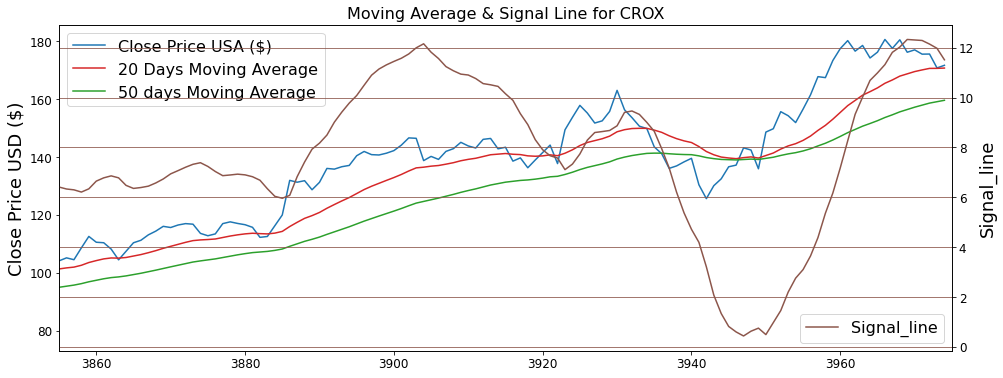

In [31]:
fig, ax1 = plt.subplots()
ax2 =  ax1.twinx()
df1['Close'][-150:].plot(x = 'Index', color='tab:blue', figsize=(16,6), label = 'Close Price USA ($)', fontsize = 12, ax = ax1)
df1['Short_MV_Avg_Span'][-150:].plot(x = 'Index', color='tab:red', figsize=(16,6), label = str(short_moving_average_span) + ' Days Moving Average', fontsize = 12, ax = ax1)
df1['Long_MV_Avg_Span'][-150:].plot(x = 'Index', color='tab:green', figsize=(16,6), label = str(long_moving_average_span) + ' days Moving Average', fontsize = 12, ax = ax1)
df1['Short_MV_Avg_Span-Long_MV_Avg_Span_Lag'][-150:].plot(x = 'Index', color='tab:brown', figsize=(16,6), label = 'Signal_line', fontsize = 12, ax = ax2)
#df1['RSI'][-170:].plot(x = 'Index', color='tab:red', figsize=(16,6), label = 'Relative Strength Index', fontsize = 12,ax = ax1)
#df1['Close'][-150:].plot(x = 'Index',color = 'tab:blue', figsize=(16,6),  label = 'Close Price',fontsize = 12,ax = ax2)
#df1['Close'][-100:].plot(figsize=(16,6))
plt.xlim([len(df1)-120, len(df1)])
ax1.set_ylabel('Close Price USD ($)', fontsize = 18)
ax2.set_ylabel('Signal_line', fontsize = 18)
#df1.xlabel('Index', fontsize=18)
#df1.ylabel('Relative Strength Index', fontsize =18)
ax2.grid(color='tab:brown')
ax1.set_title("Moving Average & Signal Line for " + stock.upper(), fontsize = 16)
ax1.legend(loc=2, fontsize = 16)
ax2.legend(loc=4,fontsize = 16)
plt.show
plt.close

In [32]:
df1['Signal_Line'] = df1['Short_MV_Avg_Span-Long_MV_Avg_Span_Lag'].ewm(span = period, adjust=False ).mean()
#column_list = list(df1)
#print (column_list)
#df1=df1[['const', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Volume_Lag', 'Today_Change_%', 'Trend', 'Trend_Lag', 'Close-Open', 'Close-Open_Lag', 'High-Low', 'High-Low_Lag', 'Up_Down', 'Short_MV_Avg_Span', 'Long_MV_Avg_Span', 'Short_MV_Avg_Span-Long_MV_Avg_Span', 'Short_MV_Avg_Span-Long_MV_Avg_Span_Lag', 'Prediction_Caculated', 'Prediction_indicator', 'share', 'money', 'Up', 'Down', 'Signal_Line']]
df1['Signal_Line_Lag'] =  df1['Signal_Line'].shift(1)
df1.dropna(inplace= True)
#df1.info()

In [33]:
X = df1[['const','Trend_Lag','High-Low_Change_%','Signal_Line_Lag','Volume_Lag']]

In [34]:
y = df1["Up_Down"].values

In [35]:
model = sm.Logit(y,X)

In [36]:
result =  model.fit()

Optimization terminated successfully.
         Current function value: 0.691032
         Iterations 4


In [37]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 3974
Model:                          Logit   Df Residuals:                     3969
Method:                           MLE   Df Model:                            4
Date:                Thu, 25 Nov 2021   Pseudo R-squ.:                0.001508
Time:                        19:22:04   Log-Likelihood:                -2746.2
converged:                       True   LL-Null:                       -2750.3
Covariance Type:            nonrobust   LLR p-value:                   0.08143
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0602      0.063      0.950      0.342      -0.064       0.184
Trend_Lag             0.0377      0.109      0.344      0.730      -0.177       0.252
High-Low_Change_%    -0.6083      0.438     -1.389      0.165      -1.467       0.250
Signal_Line_Lag       0.0355      0.014      2.486      0.013       0.008       0.064
Volume_Lag           -0.0001      0.000     -0.426      0.670      -0.001       0.001
=====================================================================================
"""

In [38]:
prediction = result.predict(X)

In [39]:
df1['Prediction_Caculated'] = pd.array(prediction)
df1['Prediction_indicator'] = pd.array([1 if i > cutoff else 0 for i in prediction])
#print (df1.iloc[-1,18],df1.iloc[-1,19],df1.iloc[-1,20])

In [40]:
#print(df1.loc[[i for i in range(len(df1)-20, len(df1)+2)],['Trend_Lag', 'Short_MV_Avg_Span-Long_MV_Avg_Span_Lag', 'Up_Down', 'Prediction_indicator']])

In [41]:
y = df1["Up_Down"].values

In [42]:
def confusion_matrix(act,pred):
    predtrans = ['Up' if i > cutoff else 'Down' for i in pred]
    actuals = ['Up' if i > 0 else 'Down' for i in act]
    confusion_matrix = pd.crosstab(pd.Series(actuals),
                                   pd.Series(predtrans),
                                   rownames = ["Actual"],
                                   colnames = ["Predict"]
                                  )
    return confusion_matrix

In [43]:
confusion_matrix(y,prediction)

Predict,Down,Up
Actual,,
Down,341,1554
Up,321,1758


In [44]:
z = confusion_matrix(y,prediction)
try:
    print((z.loc['Down','Down'] + z.loc['Up','Up']) / len(df1))
except:
    pass

0.5281831907398088


In [45]:
try:
    print( (z.loc['Down', 'Down']+ z.loc['Up','Up']) / (z.loc['Down', 'Down']+ z.loc['Up','Up'] + z.loc['Down','Up']) )
except:
    pass

0.5745962222830551


In [46]:
df1 = df1.assign(share=np.nan,money=np.nan)
#df1

In [47]:
diff_years = round((df1.iloc[-1,1] - df1.iloc[0,1])/np.timedelta64(1,'Y') + 0.5)   

In [48]:
#df1.info()
#column_list = list(df1)
#print (column_list)
df1['Signal_Line_Lag'] = df1['Signal_Line'].shift(1)
df1=df1[['const', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Volume_Lag', 'Today_Change_%', 'Trend', 'Trend_Lag', 'High-Low_Change_%', 'Up_Down', 'Short_MV_Avg_Span', 'Long_MV_Avg_Span', 'Short_MV_Avg_Span-Long_MV_Avg_Span', 'Short_MV_Avg_Span-Long_MV_Avg_Span_Lag', 'Prediction_Caculated', 'Prediction_indicator', 'share', 'money', 'Signal_Line', 'Signal_Line_Lag']]
#df1.info()

In [49]:
#Simulate Investment transaction buy on opening when predict UP and sell daily average when predict DOWN

def buy_sell(open_price, sell_price,prediction, money, share):
    if prediction == 1 and money != 0:
        share =  money / open_price
        money = 0
    elif prediction == 0 and share != 0:
        money = share * sell_price
        share = 0
    else: pass
    return [money, share]
money = invest
share = 0
for i in range(len(df1)):
    [money, share] = buy_sell(df1.iloc[i,2],(df1.iloc[i,3]+df1.iloc[i,4])/2,df1.iloc[i,19], money, share)
    df1.iloc[i,20] = share
    df1.iloc[i,21] = money

In [50]:
#df1.info()

In [51]:
df1 = df1.assign(Up=np.nan,Down=np.nan)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3974 entries, 1 to 3974
Data columns (total 26 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   const                                   3974 non-null   float64       
 1   Date                                    3974 non-null   datetime64[ns]
 2   Open                                    3974 non-null   float64       
 3   High                                    3974 non-null   float64       
 4   Low                                     3974 non-null   float64       
 5   Close                                   3974 non-null   float64       
 6   Adj Close                               3974 non-null   float64       
 7   Volume                                  3974 non-null   float64       
 8   Volume_Lag                              3974 non-null   float64       
 9   Today_Change_%                          3974 non-nul

In [52]:
for i in range(len(df1)):
    if df1.iloc[i,9] <= 0:
        df1.iloc[i,24] = 0
        df1.iloc[i,25] = df1.iloc[i,9]
    else:
        df1.iloc[i,25] = 0
        df1.iloc[i,24] = df1.iloc[i,9]

AVG_Gain = df1.Up.ewm(span=period, adjust=False).mean()
AVG_Loss = df1.Down.ewm(span=period, adjust=False).mean().abs()

In [53]:
RS = AVG_Gain /AVG_Loss
RSI = 100.0 - (100.0 / (1.0 + RS))
df1['RSI'] = RSI
df1['RSI_Lag'] = df1['RSI'].shift(1)
#df1.tail(10)

<function matplotlib.pyplot.close(fig=None)>

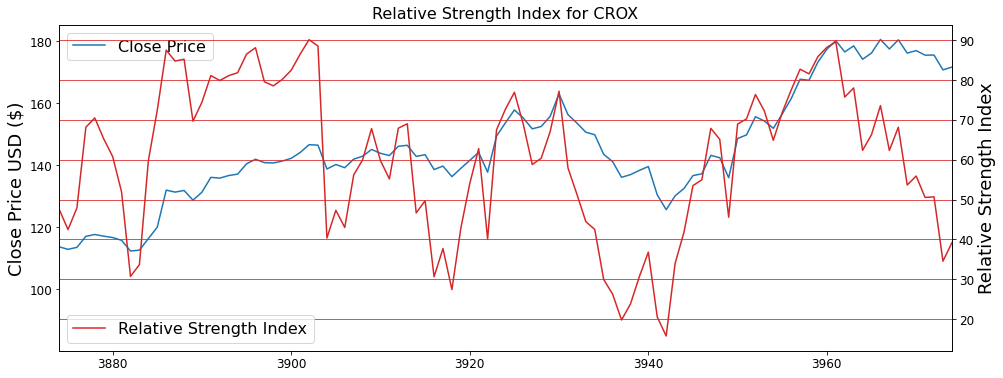

In [54]:
fig, ax1 = plt.subplots()
ax2 =  ax1.twinx()
df1['RSI'][-170:].plot(x = 'Index', color='tab:red', figsize=(16,6), label = 'Relative Strength Index', fontsize = 12,ax = ax2)
df1['Close'][-150:].plot(x = 'Index',color = 'tab:blue', figsize=(16,6),  label = 'Close Price',fontsize = 12,ax = ax1)
#df1['Close'][-100:].plot(figsize=(16,6))
plt.xlim([len(df1)-100, len(df1)])
ax2.set_ylabel('Relative Strength Index', fontsize = 18)
ax1.set_ylabel('Close Price USD ($)', fontsize = 18)
#df1.xlabel('Index', fontsize=18)
#df1.ylabel('Relative Strength Index', fontsize =18)
ax2.grid(color='tab:red')
ax1.set_title("Relative Strength Index for " + stock.upper(), fontsize = 16)
ax2.legend(loc=3, fontsize = 16)
ax1.legend(loc=2,fontsize = 16)
plt.show
plt.close

<function matplotlib.pyplot.close(fig=None)>

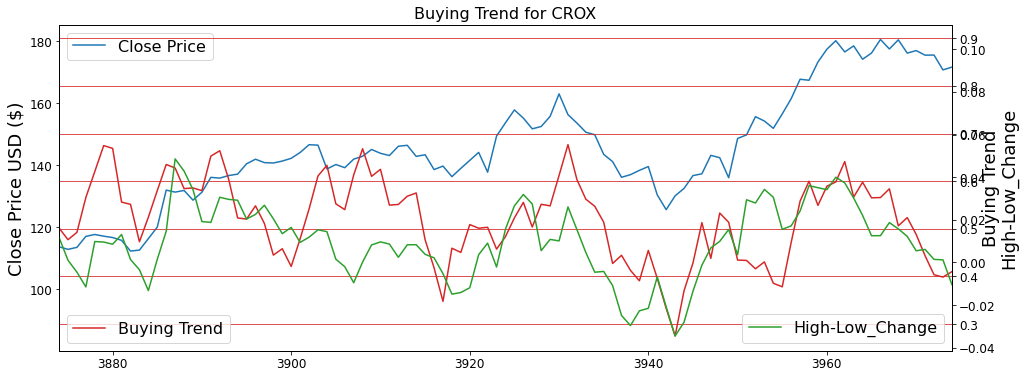

In [55]:
fig, ax1 = plt.subplots()
ax2 =  ax1.twinx()
ax3 =  ax1.twinx()
#ax3.spines.right.set_position(("axes", 1.2))
df1['Trend_Lag'][-150:].ewm(span = period, adjust=False ).mean().plot(x = 'Index', color='tab:red', figsize=(16,6), label = 'Buying Trend', fontsize = 12,ax = ax2)
df1['High-Low_Change_%'][-150:].ewm(span = period, adjust=False ).mean().plot(x = 'Index', color='tab:green', figsize=(16,6), label = 'High-Low_Change', fontsize = 12, ax = ax3)
df1['Close'][-150:].plot(x = 'Index',color = 'tab:blue', figsize=(16,6),  label = 'Close Price',fontsize = 12,ax = ax1)
ax2.set_ylabel('Buying Trend', fontsize = 18)
ax3.set_ylabel('High-Low_Change', fontsize = 18)
ax1.set_ylabel('Close Price USD ($)', fontsize = 18)
plt.xlim([len(df1)-100, len(df1)])
ax2.grid(color='tab:red')
ax1.set_title("Buying Trend for " + stock.upper(), fontsize = 16)
ax2.legend(loc=3, fontsize = 16)
ax3.legend(loc=4, fontsize = 16)
ax1.legend(loc=2,fontsize = 16)
plt.close

In [56]:
df1.dropna(inplace= True)
X = df1[['const','Trend_Lag', 'RSI_Lag', 'Signal_Line_Lag','Volume_Lag']]
y = df1["Up_Down"].values
model = sm.Logit(y,X)
result =  model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.691011
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 3973
Model:                          Logit   Df Residuals:                     3968
Method:                           MLE   Df Model:                            4
Date:                Thu, 25 Nov 2021   Pseudo R-squ.:                0.001553
Time:                        19:22:08   Log-Likelihood:                -2745.4
converged:                       True   LL-Null:                       -2749.7
Covariance Type:            nonrobust   LLR p-value:                   0.07360
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1843      0.097      1.907      0.056      -0.005       0.374
Trend_Lag           0.0693      0.116      0.598      0.550      -0.158       0.296
RSI_Lag            -0.0027      0.002     -1.477      0.140      -0.006       0.001
Signal_Line_Lag     0.0394      0.015      2.705      0.007       0.011       0.068
Volume_Lag         -0.0001      0.000     -0.422      0.673      -0.001       0.001
===================================================================================
"""

In [57]:
print("\nIf ${:,.0f} was invested in [ {} ], and Just Hold and Not Trade for {:2d} years, the ROI = ${:,.0f}".format( invest, stock.upper(), diff_years, invest/data.iloc[0, 0] * data.iloc[-1,0]))


If $100 was invested in [ CROX ], and Just Hold and Not Trade for 16 years, the ROI = $1,061


In [58]:
print ("\nIf ${:,.0f} was invested {:2d} years ago, buy and sell according this script\'s recommandation, the ROI = ${:,.0f}".format(invest, diff_years, (money + (share * df1.iloc[-1,5]))))


If $100 was invested 16 years ago, buy and sell according this script's recommandation, the ROI = $13,898


In [59]:
print(df1[['Date','Open','Close','High','Low','Trend']].tail(15))

           Date        Open       Close        High         Low     Trend
3960 2021-11-04  175.309998  177.419998  179.470001  173.800003  0.638447
3961 2021-11-05  178.029999  180.169998  180.830002  176.860001  0.833752
3962 2021-11-08  181.850006  176.539993  182.750000  174.669998  0.231435
3963 2021-11-09  175.000000  178.500000  179.740005  175.000000  0.738396
3964 2021-11-10  175.320007  174.179993  177.770004  171.610001  0.417206
3965 2021-11-11  175.300003  176.190002  178.690002  172.899994  0.568222
3966 2021-11-12  178.080002  180.570007  182.020004  177.669998  0.666668
3967 2021-11-15  181.509995  177.500000  183.880005  176.320007  0.156084
3968 2021-11-16  177.289993  180.449997  183.139999  176.389999  0.601481
3969 2021-11-17  179.589996  176.160004  181.600006  173.479996  0.330050
3970 2021-11-18  178.570007  176.979996  180.850006  175.750000  0.241175
3971 2021-11-19  175.589996  175.500000  178.440002  174.649994  0.224276
3972 2021-11-22  177.000000  175.53999

In [60]:
df1_summary=df1[['Date', 'Up_Down','Prediction_indicator']].copy()
df1_summary['Stock Market Performance'] = df1_summary['Up_Down'].apply(lambda x: 'Up' if x > 0 else 'Down')
df1_summary['Scribe Predection'] = df1_summary['Prediction_indicator'].apply(lambda x: 'Up' if x > 0 else 'Down')
print (df1_summary[['Date','Stock Market Performance','Scribe Predection']].tail(15))

           Date Stock Market Performance Scribe Predection
3960 2021-11-04                       Up                Up
3961 2021-11-05                       Up                Up
3962 2021-11-08                     Down                Up
3963 2021-11-09                       Up                Up
3964 2021-11-10                     Down                Up
3965 2021-11-11                       Up                Up
3966 2021-11-12                       Up                Up
3967 2021-11-15                     Down                Up
3968 2021-11-16                       Up                Up
3969 2021-11-17                     Down                Up
3970 2021-11-18                       Up                Up
3971 2021-11-19                     Down                Up
3972 2021-11-22                       Up                Up
3973 2021-11-23                     Down                Up
3974 2021-11-24                       Up                Up


In [61]:
#print(df1.loc[[i for i in range(len(df1)-20, len(df1)+2)],['Date','Close','Trend_Lag', 'Short_MV_Avg_Span-Long_MV_Avg_Span_Lag']])
#df1.info()

In [62]:
print ("\nToday [ %s ] actually went up," %stock.upper(), end = ' ') if (df1.iloc[-1,13] == 1) else print ("\nToday [ %s ] actually went down," %stock.upper(), end = " ")
print ("--- base on yesterday\'s data, ", end = '')
print ("We Predication [ %s ] should be going up." %stock.upper()) if (df1.iloc[-1,19] == 1) else print ("We Predicae [ %s ] should be going down." %stock.upper())
print ("\n=========> Actual and Predication MATCH <=========") if (df1.iloc[-1,13] == df1.iloc[-1,19]) else print("\n=========> Actual and Predication DO NOT match <=========")


Today [ CROX ] actually went up, --- base on yesterday's data, We Predication [ CROX ] should be going up.

=========> Actual and Predication MATCH <=========


In [63]:
x_tran= df1[df1.Date.dt.year < 2021][['const','Trend_Lag','High-Low_Change_%', 'RSI_Lag','Signal_Line_Lag','Volume_Lag']]
y_train=df1[df1.Date.dt.year < 2021]["Up_Down"]
x_test= df1[df1.Date.dt.year >= 2021][['const','Trend_Lag','High-Low_Change_%', 'RSI_Lag','Signal_Line_Lag','Volume_Lag']]
y_test= df1[df1.Date.dt.year >= 2021]["Up_Down"]

In [64]:
model = sm.Logit(y_train,x_tran)
result=model.fit()

Optimization terminated successfully.
         Current function value: 0.691329
         Iterations 4


In [65]:
#with open(stock.upper()+'.result.pickle', 'wb') as f:
#    pickle.dump(result,f)

In [66]:
#with open(stock.upper()+'.result.pickle', 'rb') as f:
#    pickle.load(f)

In [67]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Up_Down   No. Observations:                 3746
Model:                          Logit   Df Residuals:                     3740
Method:                           MLE   Df Model:                            5
Date:                Thu, 25 Nov 2021   Pseudo R-squ.:                0.001437
Time:                        19:22:08   Log-Likelihood:                -2589.7
converged:                       True   LL-Null:                       -2593.4
Covariance Type:            nonrobust   LLR p-value:                    0.1891
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1127      0.110      1.022      0.307      -0.104       0.329
Trend_Lag             0.0495      0.119      0.415      0.678      -0.184       0.283
High-Low_Change_%    -0.4364      0.490     -0.890      0.373      -1.397       0.524
RSI_Lag              -0.0011      0.002     -0.555      0.579      -0.005       0.003
Signal_Line_Lag       0.0480      0.020      2.419      0.016       0.009       0.087
Volume_Lag           -0.0001      0.000     -0.301      0.763      -0.001       0.001
=====================================================================================
"""

In [68]:
#summary_list=result.summary().as_csv().split(",")

In [69]:
#print(summary_list)

In [70]:
#print(summary_list[37:39])

In [71]:
prediction = result.predict(x_test)
confusion_matrix(y_test, prediction)

Predict,Down,Up
Actual,,
Down,0,98
Up,1,128


In [72]:
z = confusion_matrix(y_test,prediction)

In [73]:
try:
    print ("\n=========> Prediction Accuracy Rate: %.4f <=========\n"  %((z.loc['Down','Down'] + z.loc['Up','Up']) / len(x_test)))
except:
    print ("\n=========> Predication effectiveness is not avairable <=========\n" )


=========> Prediction Accuracy Rate: 0.5639 <=========



In [74]:
#df1.info()
High_Low=((df1.iloc[-1,3]-df1.iloc[-2,3])/df1.iloc[-1,3] + (df1.iloc[-1,4]-df1.iloc[-2,4])/df1.iloc[-1,4])
#df1.tail(15)

In [75]:
#prediction = result.predict(x_test)
#['const','Trend_Lag','High-Low_Change_%', 'RSI_Lag','Signal_Line_Lag','Volume_Lag']
now_up_down  = result.predict([1.0, df1.iloc[-1, 10], High_Low, df1.iloc[-1, 26] ,df1.iloc[-1, 22], df1.iloc[-1, 7]])
print ("\n=========> Current trend = %.4f,  " %now_up_down, end=' ')
print ("[ %s ] will go up! <=========" %stock.upper()) if now_up_down > cutoff else print ("[ %s ] will go down! <=========" %stock.upper()) 


=========> Current trend = 0.6611,   [ CROX ] will go up! <=========


In [76]:
#print ("\n=========> Current trend = %.4f,  " %now_up_down, end=' ')
print ("\n ============> %s Days over %s Days Moving Average Indicator \n ============> %.4f....%.4f....%.4f....%.4f....%.4f....<=============" %(short_moving_average_span, long_moving_average_span, df1.iloc[-5,16], df1.iloc[-4,16], df1.iloc[-3,16], df1.iloc[-2,16],df1.iloc[-1,16]))
if df1.iloc[-1,16] * df1.iloc[-2,16] < 0:
    print ("\n ============> Warning, It Is the Time to Sell [ %s ] <=========" %stock.upper()) if df1.iloc[-1,17] < 0 else print ("\n ============> It Is the Time to Buy [ %s ] ! <=========" %stock.upper())
else:
    print ("\n ============> No Trading Waring at this time! <=============")


 ============> 20 Days over 50 Days Moving Average Indicator 
 ============> 12.2932....12.1480....11.9787....11.5178....11.1251....<=============

 ============> No Trading Waring at this time! <=============


In [77]:
#df1.to_csv('fb.csv', index = False)